In [ ]:
#############

Student Name: Jing Zhu
Project: HAP725_W2Q3_HistogramforHospital
    
#############

In [136]:
import pandas as pd

# 1. Data Derscription

In this case we download the file"Complications_Hospital.csv" and then make a histogram of the rate of complications for hip/knee replacement patienbts at different hospitals.

In [150]:
jzdata = pd.read_csv('Complications_Hospital.csv')

In [151]:
jzdata.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Rate,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331.0,0.011480,3.80,2.60,5.50,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549.0,0.000730,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578.0,0.009896,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445.0,0.006112,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429.0,0.000082,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015


In [152]:
print('Number of instances = %d'% (jzdata.shape[0])) 
print('Number of attributes = %d'% (jzdata.shape[1]))

Number of instances = 52877
Number of attributes = 19


# 2. Data Cleaning

2.1 Missing Values

According to the description of the data, the missing values are encoded as "Not Available" in the original data. Also, all the missing values are in the same column. Therefore, I decide to deleted those values.

In [153]:
import numpy as np
jzdata = jzdata.replace('NaN',np.NaN)
print('Number of instances = %d' % (jzdata.shape[0]))
print('Number of attributes = %d' % (jzdata.shape[1]))
print('Number of missing values:')
for col in jzdata.columns:
    print('\t%s: %d'%(col,jzdata[col].isna().sum()))

Number of instances = 52877
Number of attributes = 19
Number of missing values:
	Provider ID: 0
	Hospital Name: 0
	Address: 0
	City: 0
	State: 0
	ZIP Code: 0
	County Name: 165
	Phone Number: 0
	Measure Name: 0
	Measure ID: 0
	Compared to National: 18334
	Denominator: 25020
	Rate: 0
	Score: 21801
	Lower Estimate: 21801
	Higher Estimate: 21801
	Footnote: 31073
	Measure Start Date: 0
	Measure End Date: 0


In [162]:
data = jzdata.dropna(axis = 0, how='all') #drop all rows that have missing values in the columns

In [163]:
data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Rate,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331.0,0.011480,3.80,2.60,5.50,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549.0,0.000730,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578.0,0.009896,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445.0,0.006112,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429.0,0.000082,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015


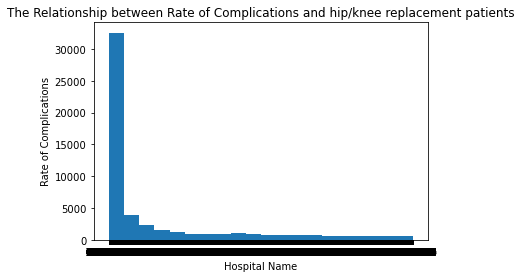

In [168]:
import matplotlib.pyplot as plt
plt.hist(data['Rate'],bins =20)
plt.title('The Relationship between Rate of Complications and hip/knee replacement patients')
plt.xlabel('Hospital Name')
plt.ylabel('Rate of Complications')
plt.show()